In [1]:
# 기본 라이브러리 임포트
import pandas as pd             
import numpy as np             
import matplotlib.pyplot as plt 
import seaborn as sns           
import gc                       # 가비지 컬렉션(메모리 해제)
import re                       # 정규 표현식 처리
from collections import defaultdict  # 기본값이 있는 딕셔너리 생성

# 경고 메시지 억제
import warnings
warnings.filterwarnings('ignore')   

# 그래프 스타일 설정
sns.set()                           # seaborn 기본 스타일 적용

# matplotlib 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
# plt.rcParams['font.family'] = 'AppleGothic'  
plt.rcParams['figure.figsize'] = (12, 6)       # 그림 크기 설정 (가로, 세로)
plt.rcParams['font.size'] = 14                 # 폰트 크기 설정
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지

# 결측치 시각화 라이브러리 임포트
import missingno                          # 결측치 분포를 시각화하는 유틸리티

# 범주형 변수 레이블 인코딩을 위한 도구 임포트
from sklearn.preprocessing import LabelEncoder

# 중복 조합 생성에 사용할 product 함수 임포트
from itertools import product

# 회귀 및 통계 분석을 위한 statsmodels 임포트
import statsmodels.api as sm

# 다중공선성 진단용 VIF 계산 함수 임포트
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# 데이터를 불러온다.
df2 = pd.read_parquet('채널정보_전처리.parquet')
df2

# train 데이터만 사용 (ID가 'TEST_'로 시작하는 행 제외)
df2 = df2[~df2['ID'].str.startswith('TEST_')].reset_index(drop=True)

### EDA
- 대부분의 값이 0에 몰려 있기 때문에, 0과 0이 아닌 값을 구분하여 분석을 진행

,인입일수_ARS_R6M 비0 비율(%)
인입일수_ARS_R6M,29.834833


,인입일수_ARS_R6M 통계
count,716036.000000
mean,2.912799
median,2.000000
std,2.597490
min,1.000000
max,12.000000


,인입일수_ARS_R6M 비0 비율(%)
Segment,
A,51.337449
B,50.000000
C,46.287327
D,40.691555
E,26.757601


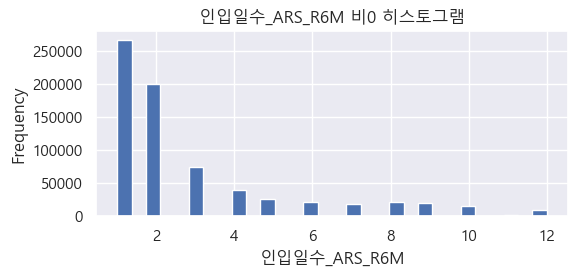

,인입월수_ARS_R6M 비0 비율(%)
인입월수_ARS_R6M,29.311875


,인입월수_ARS_R6M 통계
count,703485.000000
mean,1.870943
median,1.000000
std,1.536254
min,1.000000
max,6.000000


,인입월수_ARS_R6M 비0 비율(%)
Segment,
A,50.514403
B,52.083333
C,45.526295
D,40.033845
E,26.274887


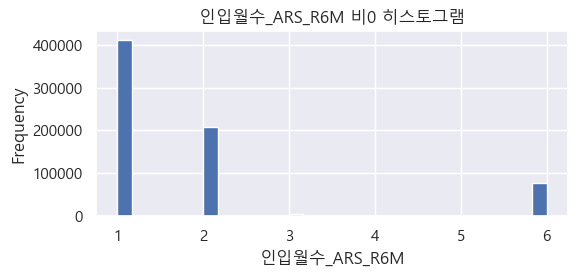

,인입후경과월_ARS 비0 비율(%)
인입후경과월_ARS,21.65875


,인입후경과월_ARS 통계
count,519810.000000
mean,3.240317
median,3.000000
std,1.390689
min,1.000000
max,5.000000


,인입후경과월_ARS 비0 비율(%)
Segment,
A,34.567901
B,25.000000
C,30.395799
D,27.777301
E,19.960230


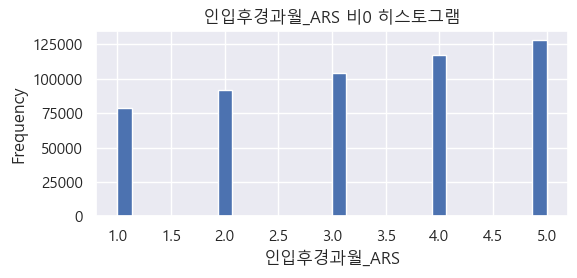

,인입횟수_ARS_B0M 비0 비율(%)
인입횟수_ARS_B0M,6.176958


,인입횟수_ARS_B0M 통계
count,148247.000000
mean,2.067354
median,2.000000
std,0.250688
min,1.000000
max,3.000000


,인입횟수_ARS_B0M 비0 비율(%)
Segment,
A,13.374486
B,22.916667
C,13.223607
D,10.585210
E,4.903301


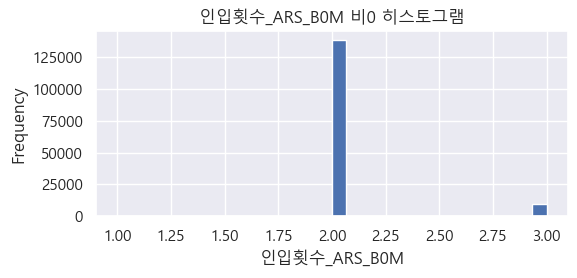

,이용메뉴건수_ARS_B0M 비0 비율(%)
이용메뉴건수_ARS_B0M,6.213875


,이용메뉴건수_ARS_B0M 통계
count,149133.000000
mean,5.143389
median,5.000000
std,0.415819
min,4.000000
max,7.000000


,이용메뉴건수_ARS_B0M 비0 비율(%)
Segment,
A,13.888889
B,22.916667
C,13.297280
D,10.661089
E,4.930460


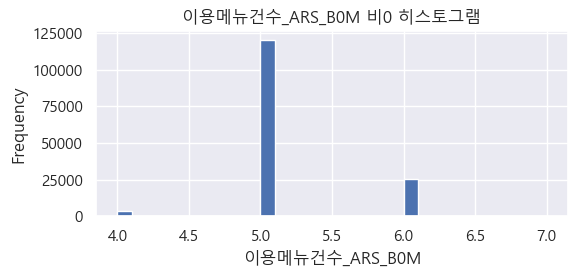

,인입일수_ARS_B0M 비0 비율(%)
인입일수_ARS_B0M,6.175125


,인입일수_ARS_B0M 통계
count,148203.000000
mean,1.691147
median,2.000000
std,0.462022
min,1.000000
max,2.000000


,인입일수_ARS_B0M 비0 비율(%)
Segment,
A,13.580247
B,22.916667
C,13.217337
D,10.591223
E,4.900232


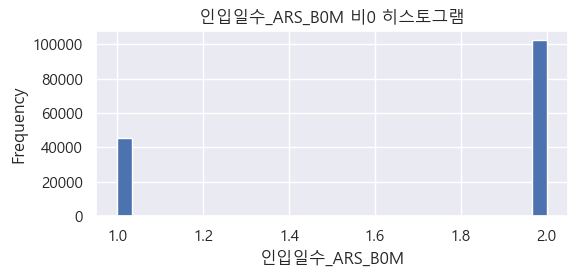

,방문월수_PC_R6M 비0 비율(%)
방문월수_PC_R6M,13.961208


,방문월수_PC_R6M 통계
count,335069.000000
mean,3.415744
median,1.000000
std,2.498210
min,1.000000
max,6.000000


,방문월수_PC_R6M 비0 비율(%)
Segment,
A,47.016461
B,50.694444
C,31.689788
D,24.417453
E,10.864951


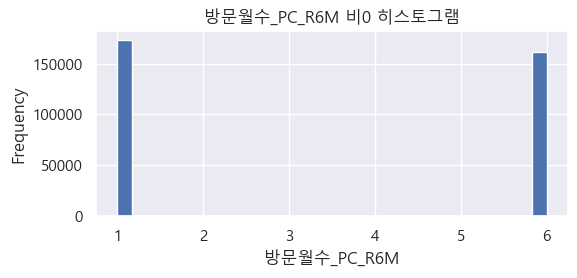

,방문후경과월_PC_R6M 비0 비율(%)
방문후경과월_PC_R6M,92.405542


,방문후경과월_PC_R6M 통계
count,2.217733e+06
mean,5.840580e+00
median,6.000000e+00
std,7.242350e-01
min,1.000000e+00
max,6.000000e+00


,방문후경과월_PC_R6M 비0 비율(%)
Segment,
A,72.325103
B,65.972222
C,80.772004
D,86.218725
E,94.314098


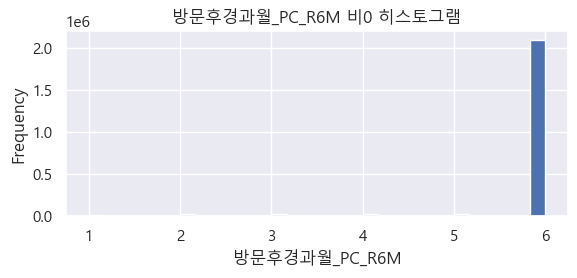

,방문일수_앱_R6M 비0 비율(%)
방문일수_앱_R6M,22.881875


,방문일수_앱_R6M 통계
count,549165.000000
mean,16.954358
median,11.000000
std,14.818949
min,1.000000
max,64.000000


,방문일수_앱_R6M 비0 비율(%)
Segment,
A,32.818930
B,65.277778
C,38.732659
D,36.586092
E,19.331371


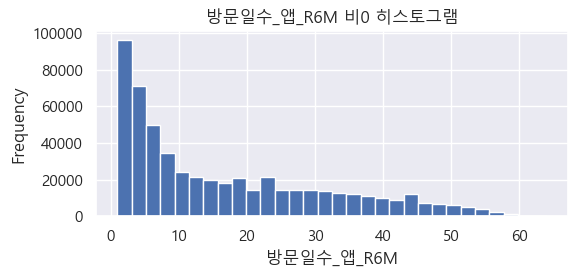

,방문월수_앱_R6M 비0 비율(%)
방문월수_앱_R6M,23.324792


,방문월수_앱_R6M 통계
count,559795.000000
mean,4.496348
median,6.000000
std,2.048145
min,1.000000
max,6.000000


,방문월수_앱_R6M 비0 비율(%)
Segment,
A,33.230453
B,65.972222
C,39.171565
D,37.084600
E,19.764450


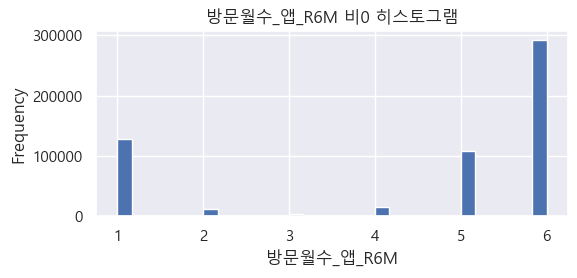

,방문후경과월_앱_R6M 비0 비율(%)
방문후경과월_앱_R6M,81.580542


,방문후경과월_앱_R6M 통계
count,1.957933e+06
mean,5.850201e+00
median,6.000000e+00
std,7.429776e-01
min,1.000000e+00
max,6.000000e+00


,방문후경과월_앱_R6M 비0 비율(%)
Segment,
A,74.279835
B,40.277778
C,68.419939
D,69.809473
E,84.599792


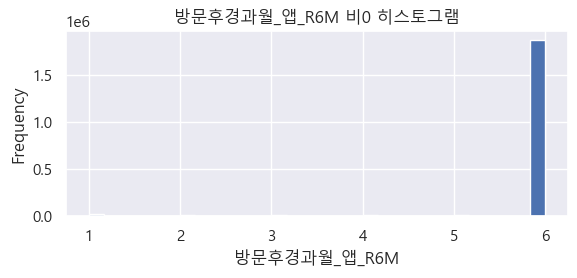

,방문횟수_PC_B0M 비0 비율(%)
방문횟수_PC_B0M,7.048875


,방문횟수_PC_B0M 통계
count,169173.000000
mean,5.733368
median,6.000000
std,0.595173
min,3.000000
max,9.000000


,방문횟수_PC_B0M 비0 비율(%)
Segment,
A,25.411523
B,31.944444
C,18.109570
D,12.863000
E,5.247048


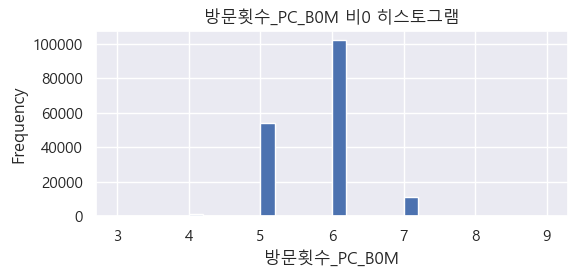

,방문일수_PC_B0M 비0 비율(%)
방문일수_PC_B0M,7.038708


,방문일수_PC_B0M 통계
count,168929.000000
mean,4.255338
median,4.000000
std,0.483571
min,2.000000
max,6.000000


,방문일수_PC_B0M 비0 비율(%)
Segment,
A,25.000000
B,31.944444
C,18.070382
D,12.840666
E,5.241221


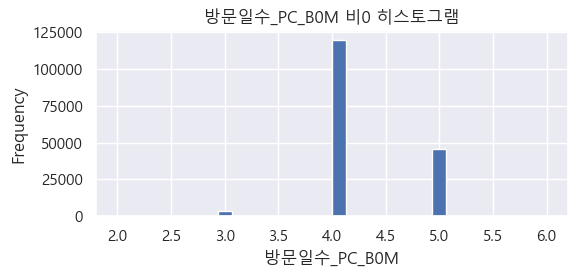

,방문횟수_앱_B0M 비0 비율(%)
방문횟수_앱_B0M,17.886917


,방문횟수_앱_B0M 통계
count,429286.000000
mean,5.348525
median,4.000000
std,2.493747
min,1.000000
max,16.000000


,방문횟수_앱_B0M 비0 비율(%)
Segment,
A,24.897119
B,56.944444
C,30.681872
D,29.399099
E,14.939294


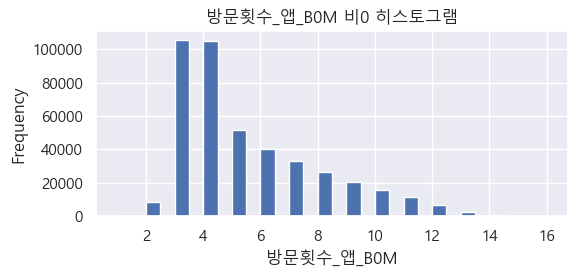

,방문일수_앱_B0M 비0 비율(%)
방문일수_앱_B0M,17.872833


,방문일수_앱_B0M 통계
count,428948.000000
mean,4.305431
median,4.000000
std,1.859291
min,1.000000
max,11.000000


,방문일수_앱_B0M 비0 비율(%)
Segment,
A,25.102881
B,56.944444
C,30.659143
D,29.385641
E,14.925559


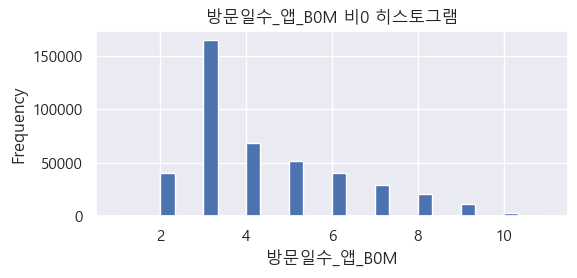

,인입횟수_IB_R6M 비0 비율(%)
인입횟수_IB_R6M,28.48625


,인입횟수_IB_R6M 통계
count,683670.000000
mean,3.476954
median,3.000000
std,2.497566
min,1.000000
max,15.000000


,인입횟수_IB_R6M 비0 비율(%)
Segment,
A,52.777778
B,52.777778
C,44.093581
D,38.768819
E,25.567727


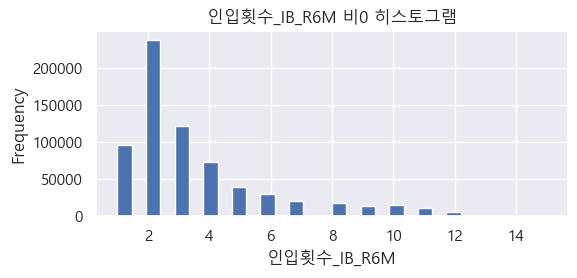

,인입일수_IB_R6M 비0 비율(%)
인입일수_IB_R6M,28.363625


,인입일수_IB_R6M 통계
count,680727.000000
mean,2.224827
median,2.000000
std,1.495176
min,1.000000
max,8.000000


,인입일수_IB_R6M 비0 비율(%)
Segment,
A,51.954733
B,52.083333
C,43.882749
D,38.611908
E,25.457584


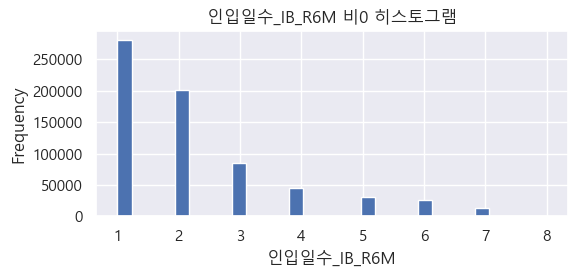

,인입월수_IB_R6M 비0 비율(%)
인입월수_IB_R6M,28.289125


,인입월수_IB_R6M 통계
count,678939.000000
mean,1.485357
median,1.000000
std,0.788120
min,1.000000
max,6.000000


,인입월수_IB_R6M 비0 비율(%)
Segment,
A,52.983539
B,52.777778
C,43.807508
D,38.484489
E,25.392133


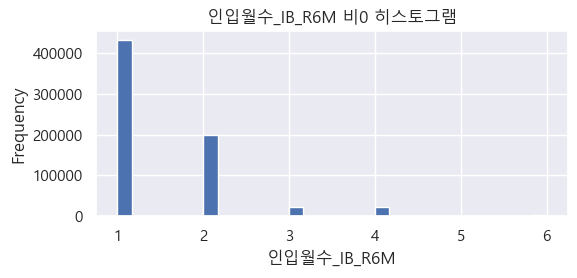

,이용메뉴건수_IB_R6M 비0 비율(%)
이용메뉴건수_IB_R6M,28.221625


,이용메뉴건수_IB_R6M 통계
count,677319.000000
mean,2.189348
median,2.000000
std,1.161763
min,1.000000
max,6.000000


,이용메뉴건수_IB_R6M 비0 비율(%)
Segment,
A,51.851852
B,52.083333
C,43.668783
D,38.452992
E,25.323404


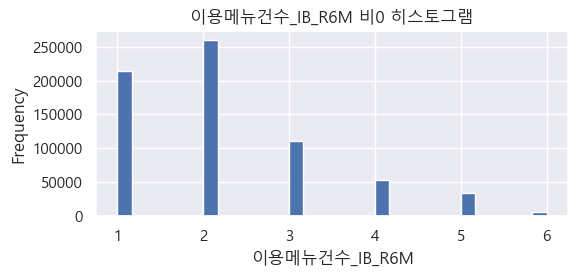

,상담건수_R6M 비0 비율(%)
상담건수_R6M,29.718792


,상담건수_R6M 통계
count,713251.000000
mean,3.535659
median,3.000000
std,2.474696
min,1.000000
max,13.000000


,상담건수_R6M 비0 비율(%)
Segment,
A,55.761317
B,55.555556
C,46.038875
D,40.339650
E,26.690485


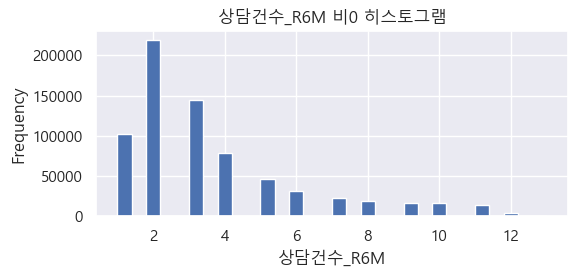

,IB문의건수_사용승인내역_R6M 비0 비율(%)
IB문의건수_사용승인내역_R6M,5.236792


,IB문의건수_사용승인내역_R6M 통계
count,125683.000000
mean,1.893120
median,2.000000
std,0.308962
min,1.000000
max,2.000000


,IB문의건수_사용승인내역_R6M 비0 비율(%)
Segment,
A,16.358025
B,18.055556
C,11.601223
D,8.984315
E,4.126787


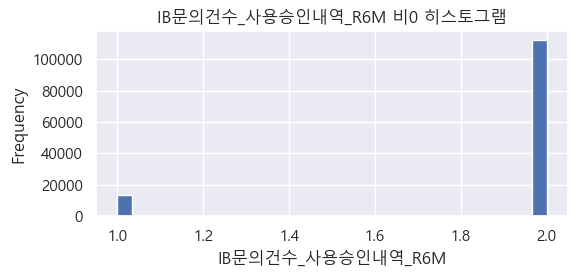

,IB문의건수_선결제_R6M 비0 비율(%)
IB문의건수_선결제_R6M,5.673875


,IB문의건수_선결제_R6M 통계
count,136173.000000
mean,2.864995
median,3.000000
std,0.944071
min,1.000000
max,6.000000


,IB문의건수_선결제_R6M 비0 비율(%)
Segment,
A,9.465021
B,16.666667
C,11.228153
D,9.695283
E,4.571729


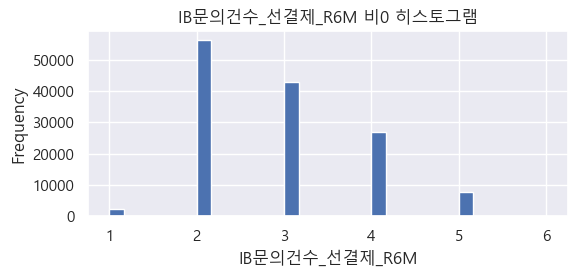

,불만제기후경과월_R12M 비0 비율(%)
불만제기후경과월_R12M,54.74675


,불만제기후경과월_R12M 통계
count,1313922.0
mean,12.0
median,12.0
std,0.0
min,12.0
max,12.0


,불만제기후경과월_R12M 비0 비율(%)
Segment,
A,84.567901
B,83.333333
C,76.980955
D,70.759531
E,50.344007


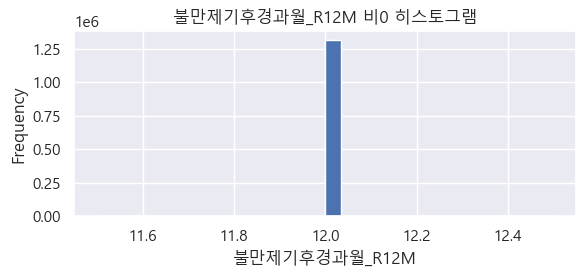

,당사멤버쉽_방문횟수_B0M 비0 비율(%)
당사멤버쉽_방문횟수_B0M,5.083625


,당사멤버쉽_방문횟수_B0M 통계
count,122007.000000
mean,27.461506
median,23.000000
std,11.500751
min,1.000000
max,63.000000


,당사멤버쉽_방문횟수_B0M 비0 비율(%)
Segment,
A,5.041152
B,8.333333
C,11.844972
D,8.993477
E,3.924139


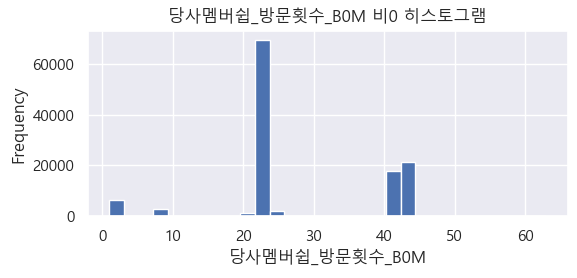

,당사멤버쉽_방문횟수_R6M 비0 비율(%)
당사멤버쉽_방문횟수_R6M,13.657


,당사멤버쉽_방문횟수_R6M 통계
count,327768.000000
mean,83.519465
median,8.000000
std,96.672260
min,1.000000
max,259.000000


,당사멤버쉽_방문횟수_R6M 비0 비율(%)
Segment,
A,17.181070
B,22.916667
C,26.355514
D,22.668522
E,11.174151


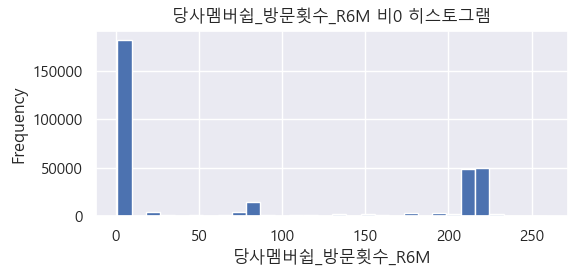

,당사멤버쉽_방문월수_R6M 비0 비율(%)
당사멤버쉽_방문월수_R6M,14.486875


,당사멤버쉽_방문월수_R6M 통계
count,347685.000000
mean,4.062421
median,6.000000
std,2.379761
min,1.000000
max,6.000000


,당사멤버쉽_방문월수_R6M 비0 비율(%)
Segment,
A,18.209877
B,25.694444
C,28.108002
D,24.174068
E,11.819763


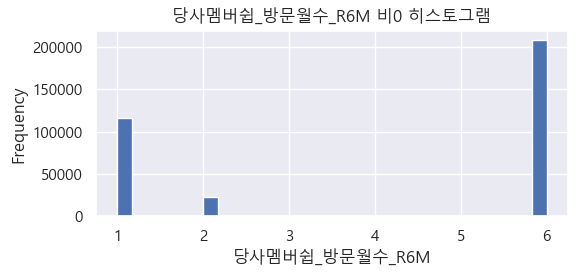

,홈페이지_금융건수_R6M 비0 비율(%)
홈페이지_금융건수_R6M,12.536042


,홈페이지_금융건수_R6M 통계
count,300865.000000
mean,5.883230
median,6.000000
std,2.319744
min,1.000000
max,15.000000


,홈페이지_금융건수_R6M 비0 비율(%)
Segment,
A,24.897119
B,59.722222
C,24.682969
D,21.550673
E,10.081933


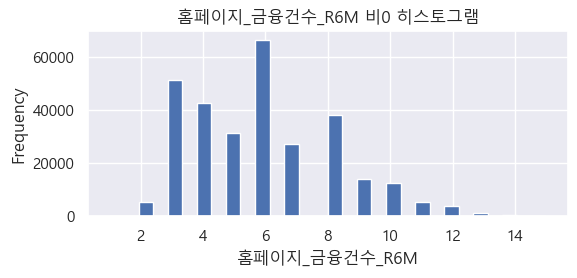

,홈페이지_선결제건수_R6M 비0 비율(%)
홈페이지_선결제건수_R6M,12.342125


,홈페이지_선결제건수_R6M 통계
count,296211.000000
mean,7.911016
median,7.000000
std,4.955007
min,1.000000
max,30.000000


,홈페이지_선결제건수_R6M 비0 비율(%)
Segment,
A,24.485597
B,45.138889
C,24.415707
D,21.437571
E,9.879389


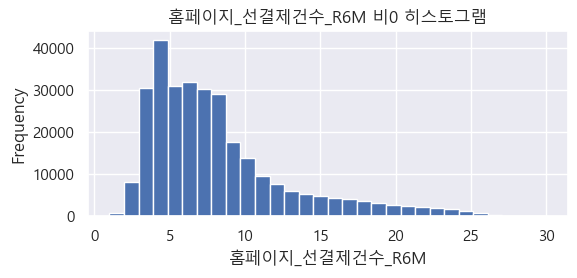

,홈페이지_금융건수_R3M 비0 비율(%)
홈페이지_금융건수_R3M,11.107


,홈페이지_금융건수_R3M 통계
count,266568.000000
mean,3.661857
median,3.000000
std,0.877954
min,2.000000
max,8.000000


,홈페이지_금융건수_R3M 비0 비율(%)
Segment,
A,23.456790
B,52.083333
C,22.352849
D,19.370522
E,8.849657


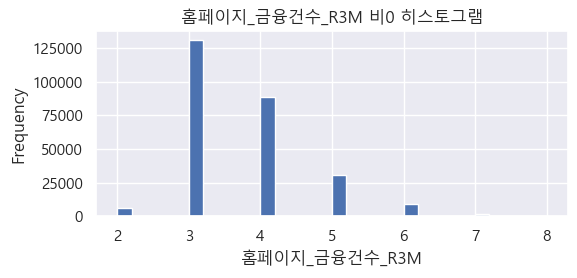

,홈페이지_선결제건수_R3M 비0 비율(%)
홈페이지_선결제건수_R3M,10.617


,홈페이지_선결제건수_R3M 통계
count,254808.000000
mean,4.958337
median,4.000000
std,2.293783
min,1.000000
max,16.000000


,홈페이지_선결제건수_R3M 비0 비율(%)
Segment,
A,21.502058
B,41.666667
C,21.469551
D,18.825628
E,8.397223


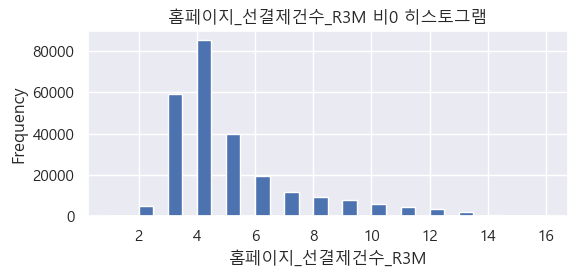

In [3]:
# 문자+숫자 혼합 컬럼 리스트 (숫자 추출 대상)
mixed_cols = [
    '인입횟수_ARS_R6M_num',
    '이용메뉴건수_ARS_R6M_num',
    '방문횟수_PC_R6M_num',
    '방문일수_PC_R6M_num',
    '방문횟수_앱_R6M_num'
]

# 혼합 컬럼에서 숫자만 추출해 새로운 컬럼 생성
for col in mixed_cols:
    s = df2[col].fillna('').astype(str)
    df2[f'{col}_num'] = pd.to_numeric(
        s.str.extract(r'(\d+)', expand=False),
        errors='coerce'
    ).fillna(0).astype(int)

# 분석에서 제외할 컬럼 리스트
exclude_cols = ['ID', 'Segment', '기준년월']

# 수치형 컬럼 리스트 생성 (원본 혼합 컬럼 제외, 추출된 _num 포함)
num_cols = [
    col for col in df2.select_dtypes(include='number').columns
    if col not in exclude_cols and not col.endswith('_flag')
]

# 0 비율 계산 및 유효 컬럼 선별
zero_ratio = pd.Series({col: (df2[col] == 0).mean() * 100 for col in num_cols})
lower, upper = 5, 95
valid_cols = zero_ratio[(zero_ratio > lower) & (zero_ratio < upper)].index.tolist()


# 유효 컬럼에 대해 0/비0 플래그 생성 및 EDA
for orig_col in valid_cols:
    # 비0 플래그 생성
    flag_col = f'{orig_col}_flag'
    df2[flag_col] = (df2[orig_col] != 0).astype(int)

    # 비0 비율 출력
    pct_nonzero = 100 - zero_ratio[orig_col]
    display(pd.DataFrame({f'{orig_col} 비0 비율(%)': [pct_nonzero]}, index=[orig_col]))

    # 비0 그룹 통계 요약 출력
    stats = (
        df2[df2[flag_col] == 1][orig_col]
        .agg(['count', 'mean', 'median', 'std', 'min', 'max'])
    )
    display(stats.to_frame(name=f'{orig_col} 통계'))

    # 세그먼트별 비0 비율 출력
    ct = (
        pd.crosstab(
            df2['Segment'],
            df2[flag_col],
            normalize='index'
        ) * 100
    )
    display(ct[1].to_frame(name=f'{orig_col} 비0 비율(%)'))

    # 히스토그램 시각화
    values = df2.loc[df2[flag_col] == 1, orig_col]
    plt.figure(figsize=(6, 3))
    plt.hist(values, bins=30)
    plt.title(f'{orig_col} 비0 히스토그램')
    plt.xlabel(orig_col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [4]:
# 세그먼트와 유효 플래그 컬럼만 모아 CSV로 저장
flags_df = df2[['Segment'] + [f'{col}_flag' for col in valid_cols]]
flags_df.to_csv('채널정보_EDA.csv', index=False, encoding='utf-8-sig')

In [7]:
# 데이터를 불러온다.
df = pd.read_csv('채널정보_EDA.csv')
c1 = df.columns

for c in c1:
    print (c)

Segment
인입일수_ARS_R6M_flag
인입월수_ARS_R6M_flag
인입후경과월_ARS_flag
인입횟수_ARS_B0M_flag
이용메뉴건수_ARS_B0M_flag
인입일수_ARS_B0M_flag
방문월수_PC_R6M_flag
방문후경과월_PC_R6M_flag
방문일수_앱_R6M_flag
방문월수_앱_R6M_flag
방문후경과월_앱_R6M_flag
방문횟수_PC_B0M_flag
방문일수_PC_B0M_flag
방문횟수_앱_B0M_flag
방문일수_앱_B0M_flag
인입횟수_IB_R6M_flag
인입일수_IB_R6M_flag
인입월수_IB_R6M_flag
이용메뉴건수_IB_R6M_flag
상담건수_R6M_flag
IB문의건수_사용승인내역_R6M_flag
IB문의건수_선결제_R6M_flag
불만제기후경과월_R12M_flag
당사멤버쉽_방문횟수_B0M_flag
당사멤버쉽_방문횟수_R6M_flag
당사멤버쉽_방문월수_R6M_flag
홈페이지_금융건수_R6M_flag
홈페이지_선결제건수_R6M_flag
홈페이지_금융건수_R3M_flag
홈페이지_선결제건수_R3M_flag


## 가설

#### 1. 당월에 ARS 이용을 많이 한 사람일수록 세그먼트 (D, E)에 속할 가능성이 높고,
#### ARS를 이용한 지 오래된 사람일수록 세그먼트 (A)에 속할 가능성이 높다.

Segment,A,B,C,D,E
인입횟수_ARS_B0M_flag,,,,,
0,0.037393,0.004929,4.916969,13.868040,81.172669
1,0.087691,0.022260,11.381006,24.936761,63.572281


<Figure size 800x400 with 0 Axes>

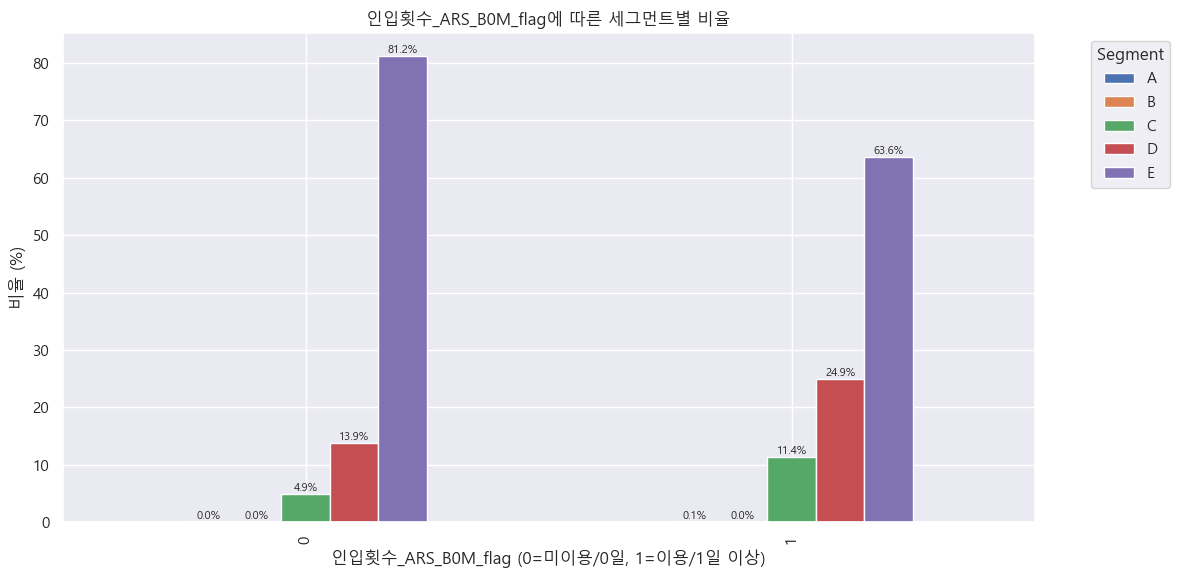

Segment,A,B,C,D,E
인입일수_ARS_B0M_flag,,,,,
0,0.037304,0.004929,4.917228,13.866836,81.173703
1,0.089067,0.022267,11.378987,24.958334,63.551345


<Figure size 800x400 with 0 Axes>

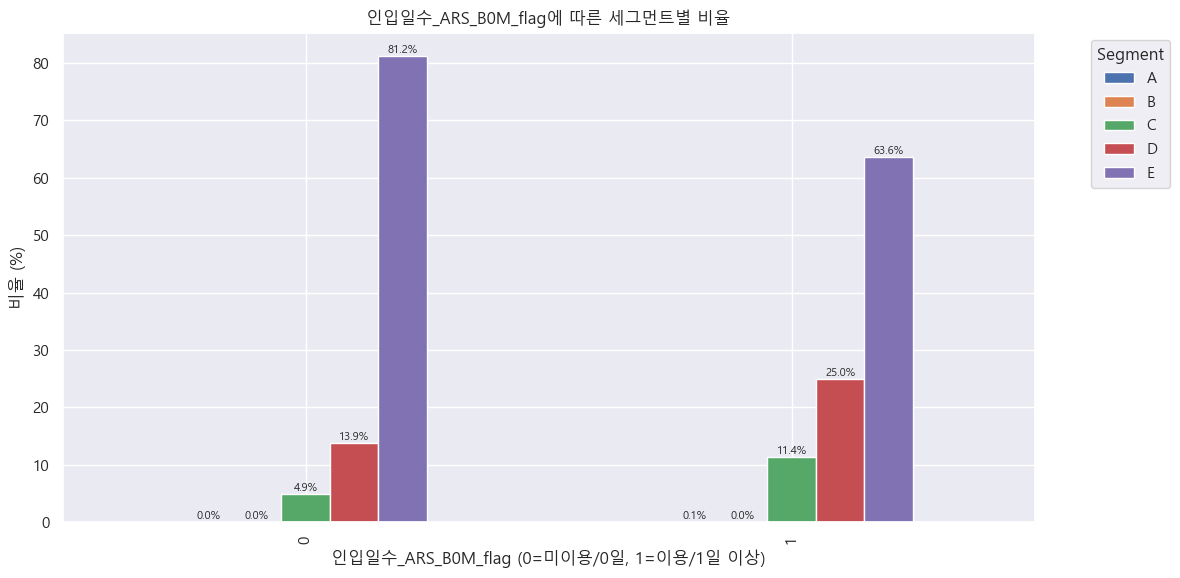

In [12]:
for flag_col in ['인입횟수_ARS_B0M_flag', '인입일수_ARS_B0M_flag']:
    ct = pd.crosstab(
        df[flag_col],
        df['Segment'],
        normalize='index'
    ) * 100
    display(ct)
    plt.figure(figsize=(8,4))
    ax = ct.plot(kind='bar', stacked=False)
    plt.title(f'{flag_col}에 따른 세그먼트별 비율')
    plt.xlabel(f'{flag_col} (0=미이용/0일, 1=이용/1일 이상)')
    plt.ylabel('비율 (%)')
    plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
    # 그래프에 비율 레이블 표시
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%',
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.show()

Segment,A,B,C,D,E
인입후경과월_ARS_flag,,,,,
0,0.033826,0.005744,4.723352,13.415240,81.821837
1,0.064639,0.006926,7.460803,18.662588,73.805044


<Figure size 800x400 with 0 Axes>

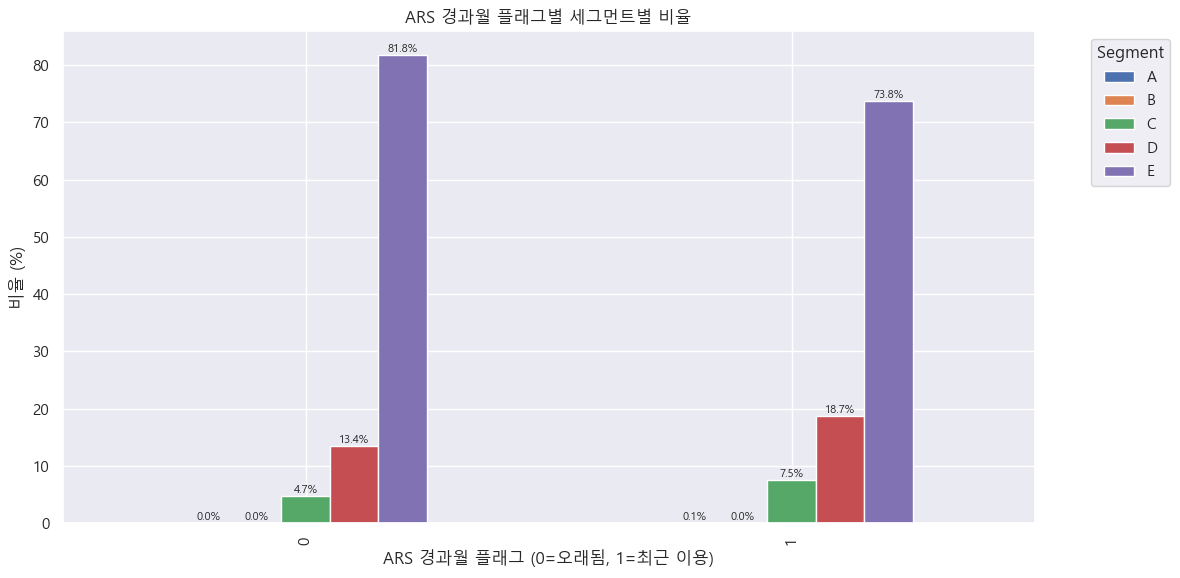

In [15]:
ct_rec = pd.crosstab(
    df['인입후경과월_ARS_flag'],
    df['Segment'],
    normalize='index'
) * 100
display(ct_rec)

plt.figure(figsize=(8,4))
ax = ct_rec.plot(kind='bar', stacked=False)
plt.title('ARS 경과월 플래그별 세그먼트별 비율')
plt.xlabel('ARS 경과월 플래그 (0=오래됨, 1=최근 이용)')
plt.ylabel('비율 (%)')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

- ARS 채널을 활발히(횟수·일수 모두 1 이상) 이용할수록 세그먼트 **‘D’** 비중이 증가, 'C'도 소량이지만 증가
- 아예 이용하지 않거나 오래 전 이용만 한 고객은 주로 ‘E’ 세그먼트
- A·B은 ARS 채널을 거의 사용하지 않음
- E 세그먼트(비활성 고객)에게는 다른 채널 전환 유도 방안을 모색하는 것이 효과적인 마케팅 방법일듯

#### 2. 최근 6개월간 상담건수가 많고 불만을 제기한 지 오래 되었을수록 세그먼트 A에 가깝다.

Segment,A,B,C,D,E
상담건수_R6M_flag,,,,,
0,0.025493,0.003794,4.081757,12.352697,83.536258
1,0.075990,0.011216,8.235670,19.752233,71.924890


<Figure size 800x400 with 0 Axes>

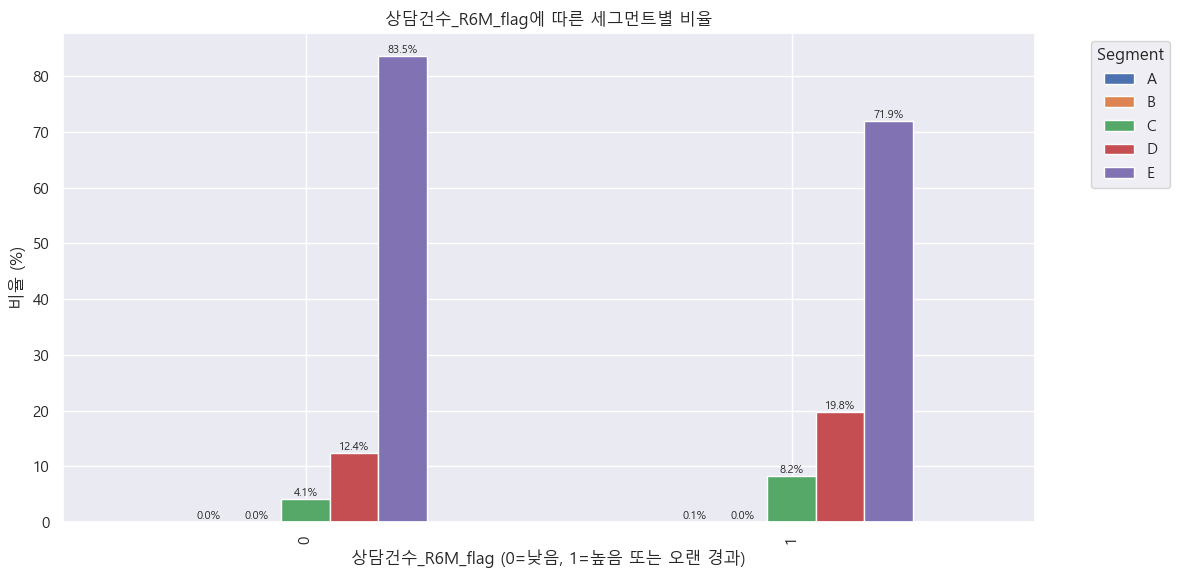

Segment,A,B,C,D,E
불만제기후경과월_R12M_flag,,,,,
0,0.013811,0.002210,2.704226,9.402640,87.877114
1,0.062561,0.009133,7.475330,18.807966,73.645011


<Figure size 800x400 with 0 Axes>

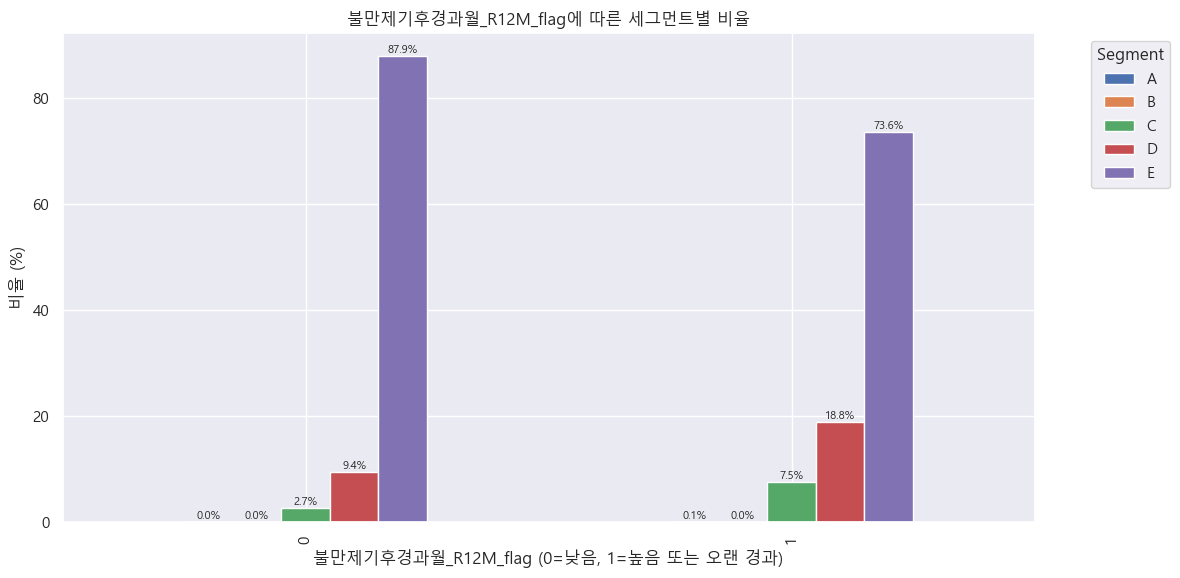

In [16]:
for flag_col in ['상담건수_R6M_flag', '불만제기후경과월_R12M_flag']:
    ct = pd.crosstab(
        df[flag_col],
        df['Segment'],
        normalize='index'
    ) * 100
    display(ct)
    plt.figure(figsize=(8,4))
    ax = ct.plot(kind='bar', stacked=False)
    plt.title(f'{flag_col}에 따른 세그먼트별 비율')
    plt.xlabel(f'{flag_col} (0=낮음, 1=높음 또는 오랜 경과)')
    plt.ylabel('비율 (%)')
    plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%',
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.show()

- “상담 많음” 혹은 “불만 오래됨” 플래그는 모두 D·C 세그먼트로 이동시키는 역할은 하지만, A 세그먼트는 ARS 채널 지표와는 별개로 “상담/불만” 행동만으로는 잘 드러나지 않는다.
- 상담 건수가 많은 고객일수록 D 세그먼트 비중이 크게 높아지고, C 세그먼트에도 일정 비율 늘어난다. 특히 D 세그먼트는 상담 활동이 활발한 고객 풀에 속해 있음을 보여준다.
- 불만을 오래 전에 제기한 고객층에서는 D 세그먼트와 C 세그먼트 비중이 크게 상승한다. 즉, 불만 이슈를 과거에 겪고 어느 정도 시간이 지난 고객이 ‘중간·저활동’ 그룹으로 분류되는 경향을 확인할 수 있습니다.


#### 2. 채널에 한번이라도 방문한 사람은 세그먼트

,A,B,C,D,E
인입횟수_ARS_B0M_flag,,,,,
0,0.037393,0.004929,4.916969,13.868040,81.172669
1,0.087691,0.022260,11.381006,24.936761,63.572281


<Figure size 800x400 with 0 Axes>

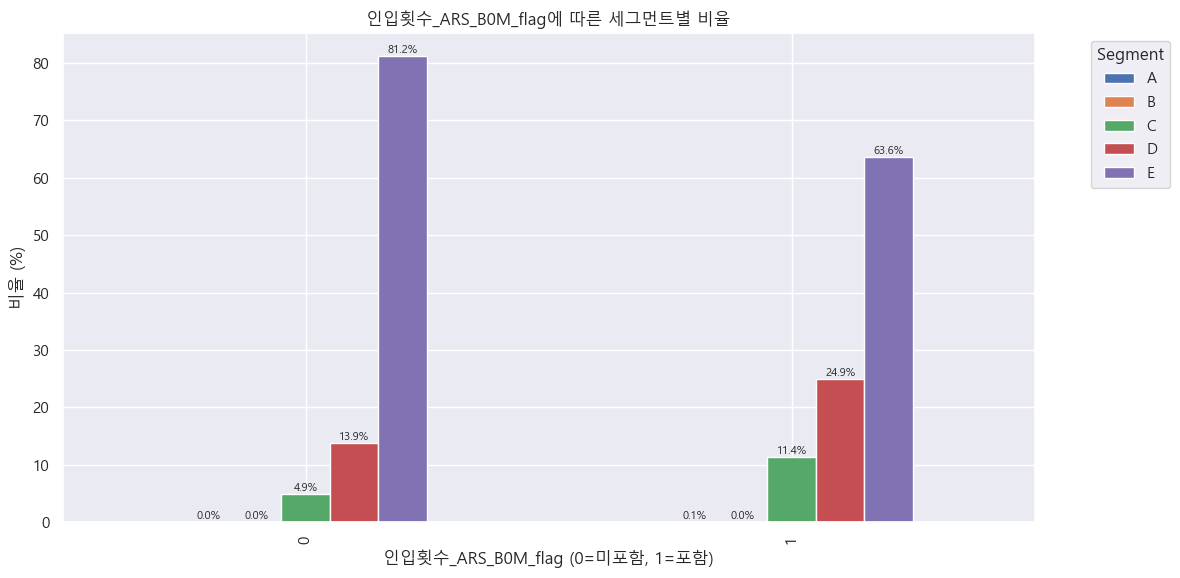

,A,B,C,D,E
방문횟수_PC_B0M_flag,,,,,
0,0.032499,0.004393,4.683644,13.641533,81.637931
1,0.146004,0.027191,13.658208,26.554474,59.614123


<Figure size 800x400 with 0 Axes>

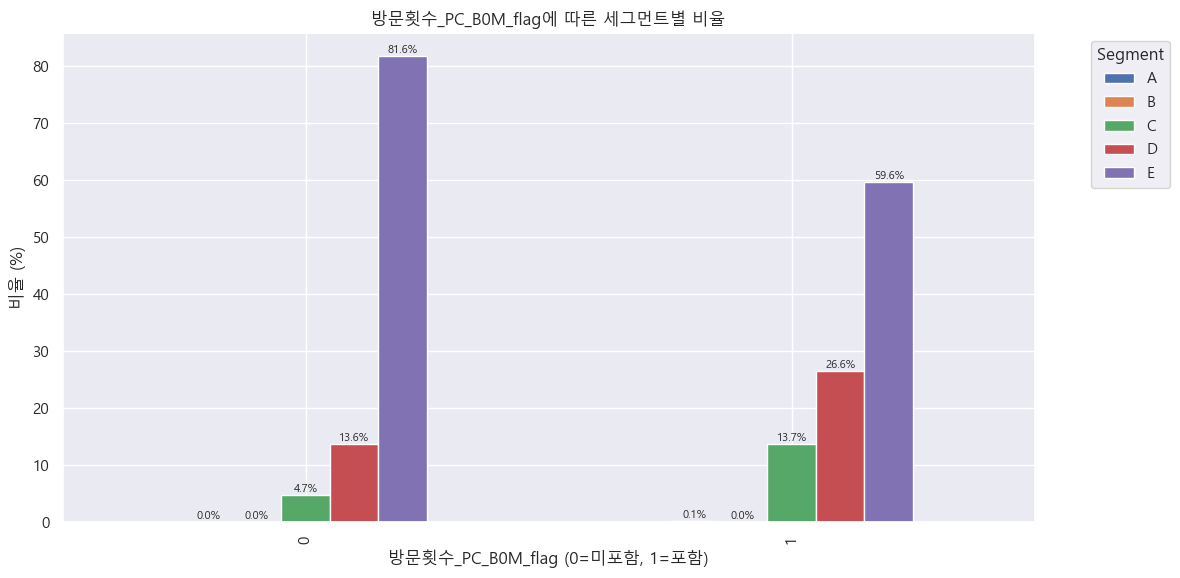

,A,B,C,D,E
방문횟수_앱_B0M_flag,,,,,
0,0.037042,0.003146,4.487866,12.511607,82.960338
1,0.056373,0.019101,9.119095,23.917388,66.888042


<Figure size 800x400 with 0 Axes>

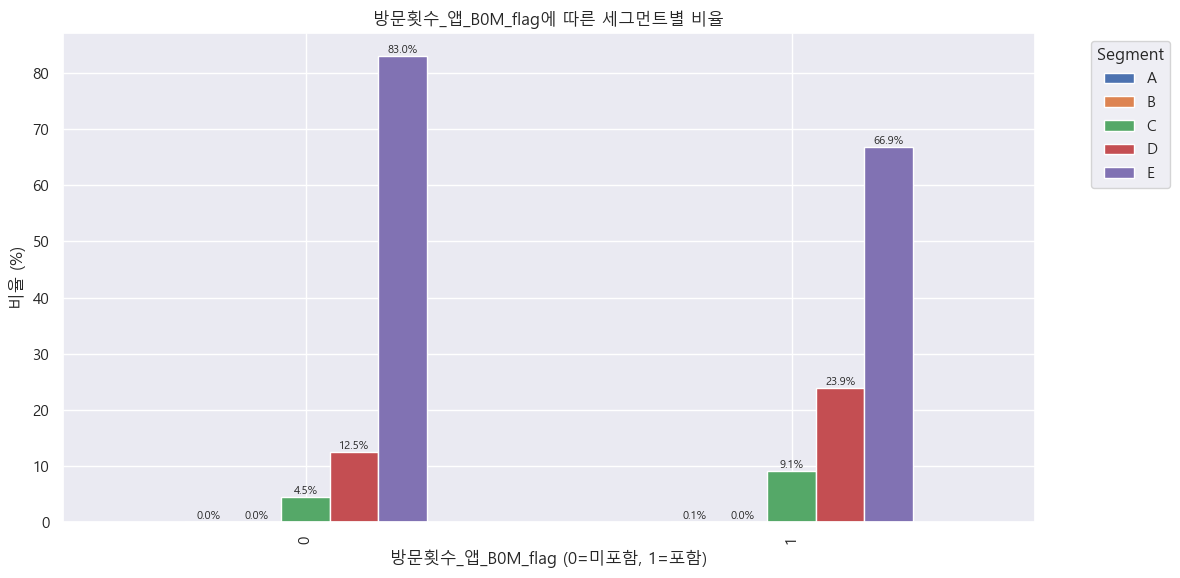

,A,B,C,D,E
인입횟수_IB_R6M_flag,,,,,
0,0.026743,0.003962,4.156019,12.459434,83.353842
1,0.075036,0.011116,8.228970,19.804438,71.880439


<Figure size 800x400 with 0 Axes>

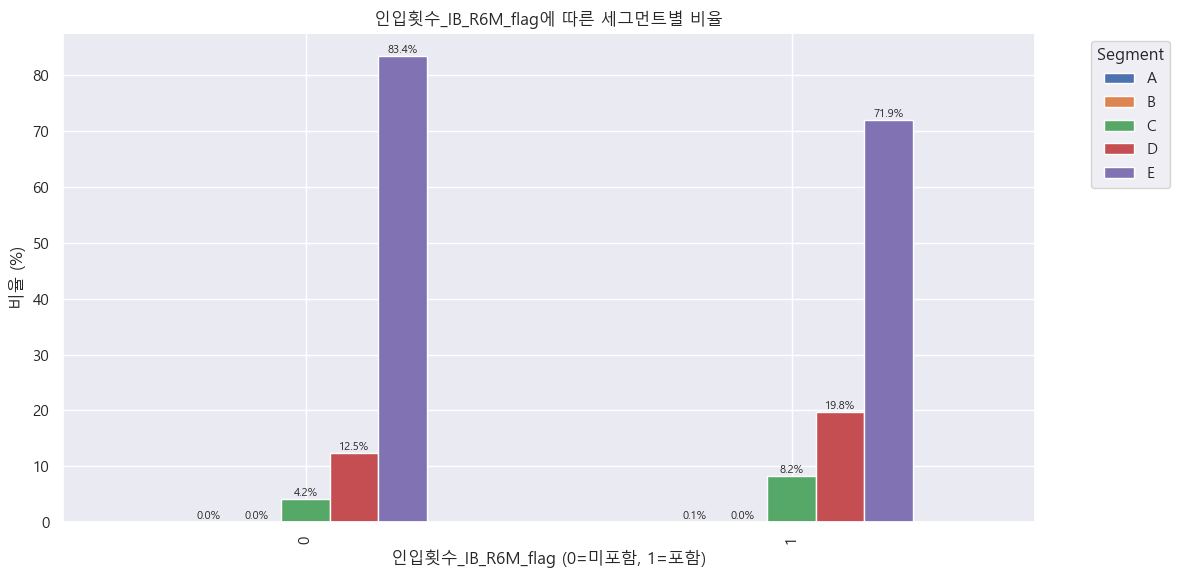

,A,B,C,D,E
당사멤버쉽_방문횟수_B0M_flag,,,,,
0,0.040518,0.005795,4.937548,13.952326,81.063814
1,0.040162,0.009836,12.386994,25.743605,61.819404


<Figure size 800x400 with 0 Axes>

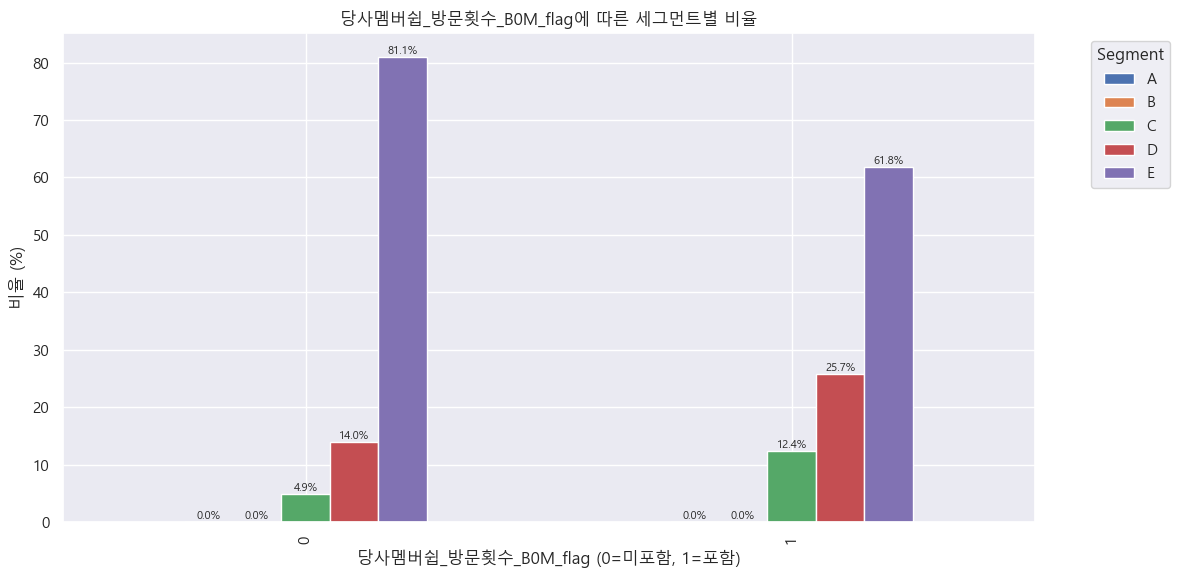

,A,B,C,D,E
당사멤버쉽_방문횟수_R6M_flag,,,,,
0,0.038847,0.005357,4.534386,13.03300,82.388410
1,0.050951,0.010068,10.259391,24.15367,65.525921


<Figure size 800x400 with 0 Axes>

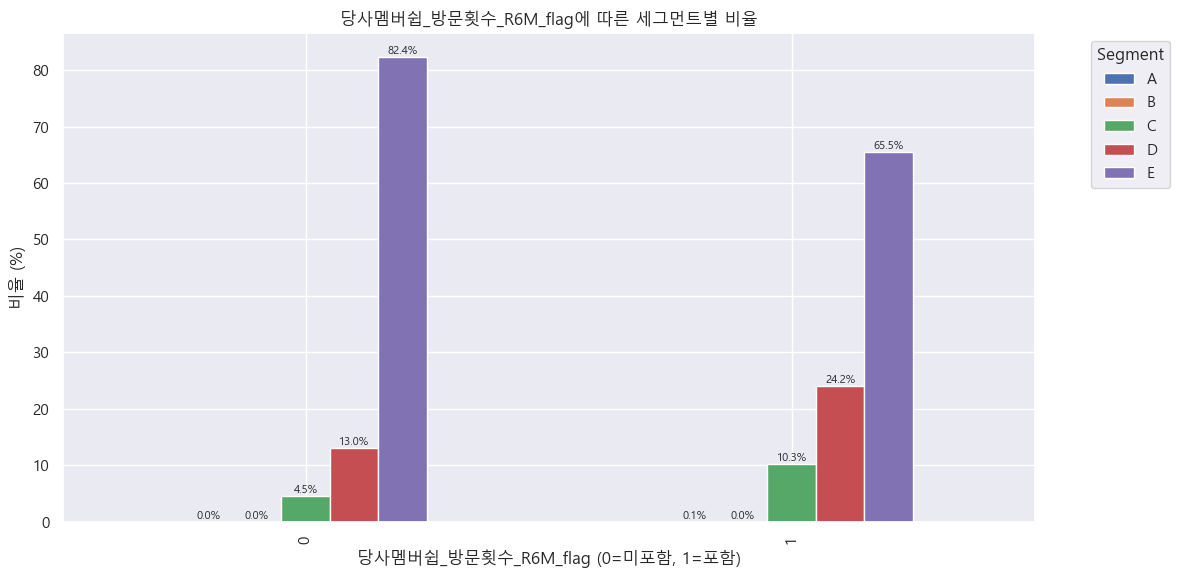

In [19]:
count_flags = [c for c in df.columns if '횟수' in c and c.endswith('_flag')]

# 각 플래그별 세그먼트 분포를 테이블과 차트로 확인
for flag_col in count_flags:
    ct = pd.crosstab(
        df[flag_col],
        df['Segment'],
        normalize='index'
    ) * 100
    display(pd.DataFrame(ct, columns=sorted(ct.columns)))

    plt.figure(figsize=(8,4))
    ax = ct.plot(kind='bar', stacked=False)
    plt.title(f'{flag_col}에 따른 세그먼트별 비율')
    plt.xlabel(f'{flag_col} (0=미포함, 1=포함)')
    plt.ylabel('비율 (%)')
    plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.annotate(f'{h:.1f}%', (p.get_x()+p.get_width()/2, h), ha='center', va='bottom', fontsize=8)
    plt.tight_layout()
    plt.show()